In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
def bar_plot(ax, data, group_stretch=0.8, bar_stretch=0.95,
             legend=True, x_labels=True, label_fontsize=8,
             colors=None, barlabel_offset=1,
             bar_labeler=lambda k, i, s: str(round(s, 3))):
    """
    original version: https://stackoverflow.com/a/69170270/9388050
    Draws a bar plot with multiple bars per data point.
    
    :param dict data             : The data we want to plot, wher keys are the 
                                   names of each bar group, and items is a list of bar 
                                   values  for the corresponding group.
      
    :param float group_stretch   : 1 means groups occupy the most (largest groups
                                   touch side to side if they have equal number of bars).
      
    :param float bar_stretch     : If 1, bars within a group will touch side to side.
    
    :param bool x_labels         : If true, x-axis will contain labels with the group
                                   names given at data, centered at the bar group.
      
    :param int label_fontsize    : Font size for the label on top of each bar.
    
    :param float barlabel_offset : Distance, in y-values, between the top of the
                                   bar and its label.
      
    :param function bar_labeler  : If not None, must be a functor with signature
                                   ``f(group_name, i, scalar)->str``, where each scalar 
                                   is the entry found at data[group_name][i]. When given, 
                                   returns a label to put on the top of each bar. 
                                   Otherwise no labels on top of bars.
    """
    for i in data.keys():
        data[i] = sorted(data[i])

    sorted_data = [(k, v) for k, v in data.items()]
    sorted_data = sorted(sorted_data)   ## sorting alphabetically
    # Printing list of tuple
    sorted_k, sorted_v  = zip(*sorted_data)

    max_n_bars = max(len(v) for v in data.values())
    group_centers = np.cumsum([max_n_bars for _ in sorted_data]) - (max_n_bars / 2)
    bar_offset = (1 - bar_stretch) / 2
    bars = defaultdict(list)
    #
    if colors is None:
        colors = {g_name: [f"C{i}" for _ in values]
                  for i, (g_name, values) in enumerate(data.items())}
    #
    for g_i, ((g_name, vals), g_center) in enumerate(zip(sorted_data,
                                                         group_centers)):
        n_bars = len(vals)
        group_beg = g_center - (n_bars / 2) + (bar_stretch / 2)
        for val_i, val in enumerate(vals):
            bar = ax.bar(group_beg + val_i + bar_offset,
                         height=val, width=bar_stretch,
                         color=colors[g_name][val_i])[0]
            bars[g_name].append(bar)
            if  bar_labeler is not None:
                x_pos = bar.get_x() + (bar.get_width() / 2.0)
                y_pos = val + barlabel_offset
                barlbl = bar_labeler(g_name, val_i, val)
                ax.text(x_pos, y_pos, barlbl, ha="center", va="bottom",
                        fontsize=label_fontsize)
                
    ## Graph settings: Legend, axis, label
    if legend:
        ax.legend([bars[k][0] for k in sorted_k], sorted_k,
                  bbox_to_anchor=(1.05,0.65), loc="lower right",  bbox_transform=fig.transFigure,
                  prop={'size': 15})
    #
    ax.set_xticks(group_centers)
    if x_labels:
        ax.set_xticklabels(sorted_k)
    else:
        ax.set_xticklabels()
        
    ## 
    ax.set_xlabel('Categories',  rotation = 0,  labelpad=10, fontsize = 20)
    ax.set_ylabel('Values',      rotation = 45, labelpad=40, fontsize = 17) 

    ax.tick_params(axis='x', labelsize= 20)
    ax.tick_params(axis='y', labelsize= 17)
    return bars, group_centers
    

(defaultdict(list,
             {'Bar': [<matplotlib.patches.Rectangle at 0x17b3cd540a0>,
              'Foo': [<matplotlib.patches.Rectangle at 0x17b3cd68970>,
              'Quack': [<matplotlib.patches.Rectangle at 0x17b3cd75d30>],
              'Zap': [<matplotlib.patches.Rectangle at 0x17b3cd83250>,
               <matplotlib.patches.Rectangle at 0x17b3cd83730>]}),
 array([ 2.5,  7.5, 12.5, 17.5]))

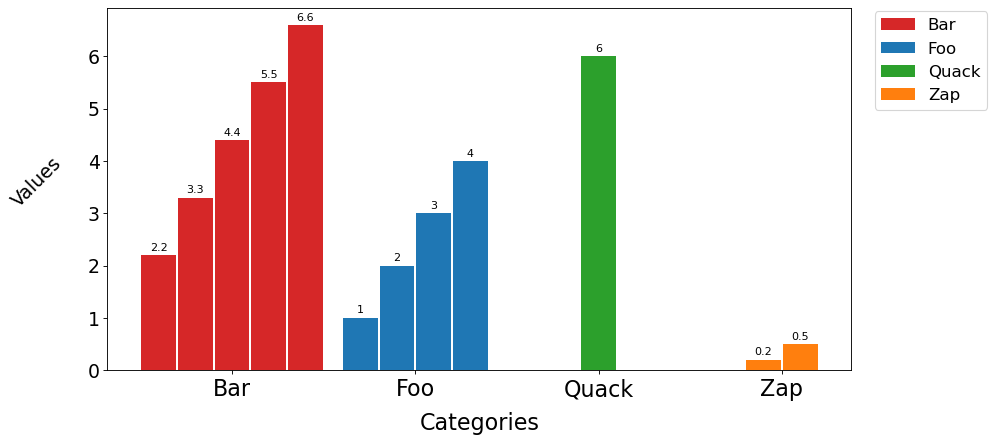

In [3]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

data = {"Foo": [4, 2, 3, 1], "Zap": [0.5, 0.2], "Quack": [6], "Bar": [6.6, 2.2, 3.3, 4.4, 5.5]}
bar_plot(ax, data, group_stretch   = 0.8,  bar_stretch    = 0.95, legend=True,
                   x_labels        = True, label_fontsize = 10, 
                   barlabel_offset = 0.05, bar_labeler    = lambda k, i, s: str(round(s, 3)))